## **Analyze the current and future trends of river flow in the Upper Indus Plain from its relationship with temperature and rain in the region.**

**Project Members:**
1. Nimrah Jawed - nj04707
2. Umme Salma - us04315
3. Swaleha Saleem - sm05152

**Variables Analyzed:**
1. Riverflow vs Time
2. Rainfall vs Time
3. Temperature vs Time
4. Temperature vs Rainfall
5. Riverflow vs Rainfall
6. Riverflow vs Temperature

In [405]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [406]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [407]:
Rain_data = pd.read_csv('/content/drive/MyDrive/Dataset_UIC/Rain.csv')
Tmax_data = pd.read_csv('/content/drive/MyDrive/Dataset_UIC/Tmax.csv')
Inflow_data = pd.read_csv('/content/drive/MyDrive/Dataset_UIC/inflow daily.csv')
Tmin_data = pd.read_csv('/content/drive/MyDrive/Dataset_UIC/Tmin.csv')
Rain_data.shape


(9132, 14)

In [408]:
Tmax_data.shape

(9132, 14)

In [409]:
Tmin_data.shape

(9132, 14)

In [410]:
Inflow_data.shape

(9132, 7)

In [411]:
Rain_data["Date"] = pd.to_datetime(Rain_data["Date"])
Inflow_data["Date"]=pd.to_datetime(Inflow_data["Date"])
Tmax_data["Date"]=pd.to_datetime(Tmax_data["Date"])
Tmin_data["Date"]=pd.to_datetime(Tmin_data["Date"])

#### Pre-Processing:

In [412]:
data_f = pd.merge(Inflow_data, Rain_data, on="Date")

In [413]:
data_f1 = pd.merge(data_f, Tmax_data, on="Date")

In [414]:
df = pd.merge(data_f1, Tmin_data, on="Date")

In [415]:
df.dtypes

Date                  datetime64[ns]
Chenab                       float64
Indus River                  float64
Jhelum                       float64
Kabul                        float64
Ravi                         float64
Satluj                       float64
Hunza_Rain                   float64
Gilgit_Rain                  float64
Shigar_Rain                  float64
Partab_Bridge_Rain           float64
Astore_Rain                  float64
Shyok_Rain                   float64
Kharmong_Rain                float64
Besham_Qilla_Rain            float64
Nimmo_Rain                   float64
LOC_Rain                     float64
Terbela_Rain                 float64
Stakna_Rain                  float64
Nimmo_Bazgo_Rain             float64
Hunza_Tmax                   float64
Gilgit_Tmax                  float64
Shigar_Tmax                  float64
Partab_Bridge_Tmax           float64
Astore_Tmax                  float64
Shyok_Tmax                   float64
Kharmong_Tmax                float64
B

##### Checking Null values:

In [416]:
df.isnull().sum()

Date                  0
Chenab                0
Indus River           0
Jhelum                0
Kabul                 0
Ravi                  0
Satluj                0
Hunza_Rain            0
Gilgit_Rain           0
Shigar_Rain           0
Partab_Bridge_Rain    0
Astore_Rain           0
Shyok_Rain            0
Kharmong_Rain         0
Besham_Qilla_Rain     0
Nimmo_Rain            0
LOC_Rain              0
Terbela_Rain          0
Stakna_Rain           0
Nimmo_Bazgo_Rain      0
Hunza_Tmax            0
Gilgit_Tmax           0
Shigar_Tmax           0
Partab_Bridge_Tmax    0
Astore_Tmax           0
Shyok_Tmax            0
Kharmong_Tmax         0
Besham_Qilla_Tmax     0
Nimmo_Tmax            0
LOC_Tmax              0
Terbela_Tmax          0
Stakna_Tmax           0
Nimmo_Bazgo_Tmax      0
Hunza_Tmin            0
Gilgit_Tmin           0
Shigar_Tmin           0
Partab_Bridge_Tmin    0
Astore_Tmin           0
Shyok_Tmin            0
Kharmong_Tmin         0
Besham_Qilla_Tmin     0
Nimmo_Tmin      

##### Removing Duplicates:

In [417]:
#checking duplicates
print("Before duplicate treatment : ", df.shape)
df.drop(df[df.duplicated()].index.tolist(), inplace=True)
print("After duplicate treatment : ", df.shape)

Before duplicate treatment :  (9132, 46)
After duplicate treatment :  (9132, 46)


##### Checking Timespan of Data:

In [418]:

print("Data recorded from {} to {}".format(min(df.Date), max(df.Date)))

Data recorded from 1980-01-01 00:00:00 to 2004-12-31 00:00:00


In [419]:
df.describe()

,Chenab,Indus River,Jhelum,Kabul,Ravi,Satluj,Hunza_Rain,Gilgit_Rain,Shigar_Rain,Partab_Bridge_Rain,Astore_Rain,Shyok_Rain,Kharmong_Rain,Besham_Qilla_Rain,Nimmo_Rain,LOC_Rain,Terbela_Rain,Stakna_Rain,Nimmo_Bazgo_Rain,Hunza_Tmax,Gilgit_Tmax,Shigar_Tmax,Partab_Bridge_Tmax,Astore_Tmax,Shyok_Tmax,Kharmong_Tmax,Besham_Qilla_Tmax,Nimmo_Tmax,LOC_Tmax,Terbela_Tmax,Stakna_Tmax,Nimmo_Bazgo_Tmax,Hunza_Tmin,Gilgit_Tmin,Shigar_Tmin,Partab_Bridge_Tmin,Astore_Tmin,Shyok_Tmin,Kharmong_Tmin,Besham_Qilla_Tmin,Nimmo_Tmin,LOC_Tmin,Terbela_Tmin,Stakna_Tmin,Nimmo_Bazgo_Tmin
count,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000,9132.000000
mean,1033.480943,2348.104756,895.335174,799.331719,164.962053,94.353206,0.734889,0.795936,0.963846,0.779572,1.752584,1.333483,2.361046,1.239626,2.549118,2.263913,3.641752,0.932647,1.938243,3.587843,6.134267,6.906036,11.764913,9.747239,4.656118,1.790279,12.643633,4.411390,5.681095,18.938717,5.856585,5.267077,-7.089898,-3.482951,-6.396224,-1.790950,-1.828099,-9.605337,-6.415758,0.659324,-7.158222,-5.459499,7.212188,-9.723797,-6.356718
std,949.450353,2437.015946,713.256176,687.051779,334.934992,316.803152,2.581105,3.251921,3.317632,2.816338,6.445142,3.524403,5.717569,3.730337,6.737713,6.904331,8.057411,2.437093,7.771061,8.545953,8.633612,10.302621,11.110791,9.571792,9.438664,6.511067,10.343125,7.864603,8.157955,7.382694,9.561722,8.290786,8.101258,7.458909,9.182119,10.226705,8.844275,9.231316,5.528604,8.986192,7.494788,7.442934,6.971717,9.734686,7.739489
min,9.150000,227.810000,67.110000,7.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.834700,-14.246990,-18.227330,-14.780440,-14.156540,-17.652440,-15.286030,-10.358220,-16.419660,-15.893890,-0.291549,-15.737890,-16.546460,-31.635630,-27.959120,-29.877610,-25.922410,-25.014080,-33.161920,-27.603730,-23.921580,-30.340320,-28.556060,-11.631240,-34.625760,-30.057450
25%,288.322500,585.317500,280.055000,273.952500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000149,0.000000,-3.285002,-1.069274,-2.556631,1.485086,1.430347,-3.905537,-3.599757,2.871357,-2.290813,-1.424018,12.417285,-3.123146,-1.692174,-13.562620,-9.254117,-13.905423,-10.256422,-8.874769,-17.174582,-10.469580,-6.600392,-13.120865,-11.377793,0.932011,-17.559188,-12.544445
50%,664.740000,1021.565000,653.980000,513.345000,61.555000,0.000000,0.000861,0.020931,0.027967,0.004362,0.005749,0.097972,0.108066,0.074456,0.069706,0.002350,0.137071,0.075845,0.000000,3.367191,5.016375,7.645083,13.671805,10.275405,4.352216,-0.310052,13.890835,3.825687,4.983647,19.431720,6.238051,4.466679,-6.586965,-2.841412,-7.077147,-3.432573,-2.179390,-10.068995,-4.580363,-0.256451,-6.894048,-4.836483,7.463041,-10.855680,-5.862792
75%,1525.447500,3597.510000,1409.635000,1190.050000,158.570000,42.120000,0.386106,0.358943,0.640254,0.333116,0.502948,0.933729,2.024611,0.882272,1.940562,1.122756,3.297132,0.729069,0.000000,10.568325,13.444427,15.822870,21.068043,17.648398,13.506377,7.367379,21.191230,11.468497,12.933950,24.814342,15.036028,12.681552,0.197960,2.664403,1.832345,7.319610,5.236214,-1.533996,-2.511763,7.648445,-1.095626,0.481314,13.565918,-1.807411,-0.138082
max,6969.290000,11049.800000,4195.910000,5075.160000,3937.320000,4077.630000,74.385460,80.701480,138.202700,95.306470,130.818300,85.328910,120.893400,93.138560,183.652000,182.490000,153.513500,62.806090,235.000000,27.434680,30.692270,32.84244

##### Building Features:

In [420]:
# building new features for time stamp.
df['Year'] = df['Date'].dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day


In [421]:
def convert_month_to_season(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3, 4, 5]:
        season = 'Spring'
    elif x in [6, 7, 8, 9]:
        season = 'Summer'
    elif x in [10, 11]:
        season = 'Autumn'
    return season

In [422]:
df['season'] = df['Month'].apply(convert_month_to_season)

In [423]:
col = df.columns
#finding average temperature
labels = ["Hunza_Temp","Gilgit_Temp","Shigar_Temp","Partab_Bridge_Temp","Astore_Temp","Shyok_Temp","Kharmong_Temp","Besham_Qilla_Temp","Nimmo_Temp","LOC_Temp","Tarbela_Temp","Stakna_Temp","Nimmo_Bazgo_Temp"]
cities_min = col[20:33] #22-32
cities_max = col[33:46]

#creating columns for all cities with average temperatures
for i in range(len(labels)):
  df[labels[i]] = (df[cities_min[i]]+df[cities_max[i]])/2


In [424]:
mean_temp=[]
for i in df.columns:
  if 'Temp' in i:
    mean_temp.append(i)

df['Temp_mean'] = df[mean_temp].mean(axis=1)

In [425]:
#average min temp
Temp_columns=[]
for i in df.columns:
  if 'Tmin' in i:
    Temp_columns.append(i)

df['Tempmin_avg'] = (df[Temp_columns].sum(axis=1) /len(Temp_columns))

#average max temp
Tempm_columns=[]
for i in df.columns:
  if 'Tmax' in i:
    Tempm_columns.append(i)

df['Tempmax_avg'] = (df[Tempm_columns].sum(axis=1) /len(Tempm_columns))


#average rain 
R_columns=[]
for i in df.columns:
  if 'Rain' in i:
    R_columns.append(i)

df['R_sum'] = df[R_columns].sum(axis=1) 
df

,Date,Chenab,Indus River,Jhelum,Kabul,Ravi,Satluj,Hunza_Rain,Gilgit_Rain,Shigar_Rain,Partab_Bridge_Rain,Astore_Rain,Shyok_Rain,Kharmong_Rain,Besham_Qilla_Rain,Nimmo_Rain,LOC_Rain,Terbela_Rain,Stakna_Rain,Nimmo_Bazgo_Rain,Hunza_Tmax,Gilgit_Tmax,Shigar_Tmax,Partab_Bridge_Tmax,Astore_Tmax,Shyok_Tmax,Kharmong_Tmax,Besham_Qilla_Tmax,Nimmo_Tmax,LOC_Tmax,Terbela_Tmax,Stakna_Tmax,Nimmo_Bazgo_Tmax,Hunza_Tmin,Gilgit_Tmin,Shigar_Tmin,Partab_Bridge_Tmin,Astore_Tmin,Shyok_Tmin,Kharmong_Tmin,Besham_Qilla_Tmin,Nimmo_Tmin,LOC_Tmin,Terbela_Tmin,Stakna_Tmin,Nimmo_Bazgo_Tmin,Year,Month,Day,season,Hunza_Temp,Gilgit_Temp,Shigar_Temp,Partab_Bridge_Temp,Astore_Temp,Shyok_Temp,Kharmong_Temp,Besham_Qilla_Temp,Nimmo_Temp,LOC_Temp,Tarbela_Temp,Stakna_Temp,Nimmo_Bazgo_Temp,Temp_mean,Tempmin_avg,Tempmax_avg,R_sum
0,1980-01-01,239.56,493.14,250.82,316.37,100.60,19.40,0.579120,0.624999,1.710244,1.979450,3.121321,18.326730,11.823350,4.068593,34.408740,33.101010,23.334460,8.383513,39.913120,-10.262910,-6.784489,-9.234474,-6.532299,-5.588862,-8.576572,-5.769681,-3.521781,-6.973469,-5.635877,5.972797,-8.205565,-6.215985,-19.762430,-13.584190,-21.149730,-16.628590,-14.912630,-18.647520,-15.562700,-9.582956,-13.882110,-15.922730,1.236497,-16.178110,-16.031870,1980,1,1,Winter,-15.012670,-10.184340,-15.192102,-11.580444,-10.250746,-13.612046,-10.666190,-6.552369,-10.427790,-10.779303,3.604647,-12.191838,-11.123928,-10.305317,-14.662236,-5.948397,181.374650
1,1980-02-01,254.29,493.99,279.56,326.14,114.90,21.38,0.738178,1.209940,0.599093,0.252871,0.397581,4.898932,2.261054,2.002728,10.752990,1.028557,11.365320,4.047374,0.000000,-13.344990,-5.962011,-11.946110,-8.339725,-6.541431,-11.167280,-6.869953,-3.468385,-9.290842,-7.728179,8.714105,-8.876868,-9.086041,-20.915340,-12.548110,-22.516540,-18.795800,-17.669290,-22.178500,-17.542000,-11.854670,-15.759650,-17.079080,-1.668406,-17.874950,-17.832930,1980,2,1,Winter,-17.130165,-9.255061,-17.231325,-13.567763,-12.105360,-16.672890,-12.205977,-7.661528,-12.525246,-12.403629,3.522849,-13.375909,-13.459485,-11.851653,-16.479636,-7.223670,39.554618
2,1980-03-01,269.01,494.84,308.30,335.91,129.20,23.36,0.068370,0.081591,0.055665,0.119646,0.234785,1.733478,0.473544,0.991438,0.215351,0.072654,5.972760,2.917583,0.000000,-11.077450,-6.782443,-9.757720,-5.140479,-3.764850,-10.299660,-5.702695,-3.518209,-8.588547,-7.019203,5.344812,-9.322336,-8.014050,-19.231320,-15.294450,-20.946820,-16.307260,-13.609550,-25.860650,-19.078580,-11.343860,-26.338550,-24.774180,-2.915537,-22.584550,-26.988840,1980,3,1,Spring,-15.154385,-11.038446,-15.352270,-10.723869,-8.687200,-18.080155,-12.390637,-7.431035,-17.463549,-15.896691,1.214638,-15.953443,-17.501445,-12.650653,-18.867242,-6.434064,12.936865
3,1980-04-01,283.73,495.69,337.04,345.68,143.50,25.34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.851470,-7.845161,-11.370530,-7.654259,-6.009645,-9.879038,-7.154660,-4.871653,-7.510703,-7.544011,3.461929,-8.208817,-7.958966,-18.140580,-12.958830,-19.064210,-14.783660,-12.680610,-23.014290,-16.022190,-9.008148,-20.739420,-19.402930,-0.678736,-20.593350,-21.142100,1980,4,1,Spring,-14.996025,-10.401995,-15.217370,-11.218960,-9.345128,-16.446664,-11.588425,-6.939901,-14.125062,-13.473470,1.391596,-14.401084,-14.550533,-11.639463,-16.017620,-7.261306,0.000000
4,1980-05-01,298.46,496.54,365.78,355.45,157.80,27.33,0.014116,0.201661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.340026,-1.523219,-6.577409,-2.895386,-1.509851,-8.329305,-4.234715,0.093251,-6.282010,-5.023972,7.433898,-7.593534,-5.932080,-14.064330,-8.152850,-15.985040,-11.756900,-10.236750,-19.276620,-12.989250,-6.582533,-19.600320,-14.773400,-0.074040,-21.335960,-16.338180,1980,5,1,Spring,-9.702178,-4.838035,-11.281225,-7.326143,-5.873301,-13.802962,-8.611982,-3.244641,-12.941165,-9.898686,3.679929,-14.464747,-11.135130,-8.418482,-13.166629,-3.670335,0.215777
...,.

In [426]:
df.to_csv("edited.csv")

#### Analyzing Temperature Data:

##### Yearwise:

Text(0, 0.5, 'Maximum Temparature')

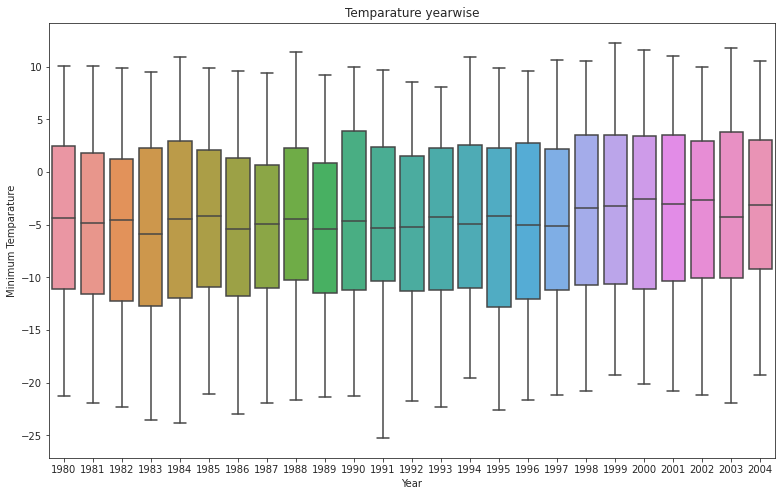

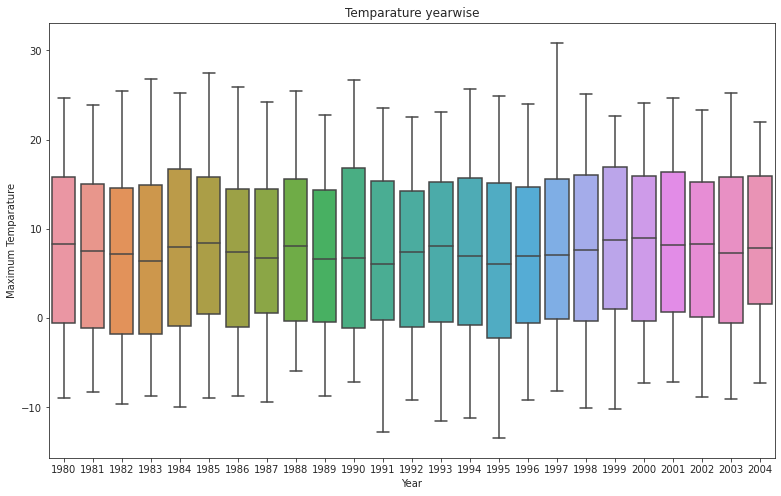

In [427]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.boxplot(data=df,y="Tempmin_avg",x="Year", ax=ax)
plt.title("Temparature yearwise")
plt.xlabel("Year")
plt.ylabel("Minimum Temparature")

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.boxplot(data=df,y="Tempmax_avg",x="Year", ax=ax)
plt.title("Temparature yearwise")
plt.xlabel("Year")
plt.ylabel("Maximum Temparature")



Text(0.5, 1.0, 'Avg. Tempeture VS Time')

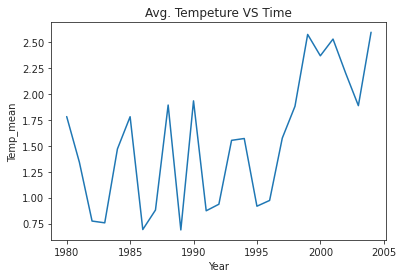

In [428]:
d=df.groupby("Year").mean()
sns.lineplot(data=d, y="Temp_mean", x="Year").set_title("Avg. Tempeture VS Time")

Text(0.5, 1.0, 'Avg. Tempetaure of 10 years VS Time')

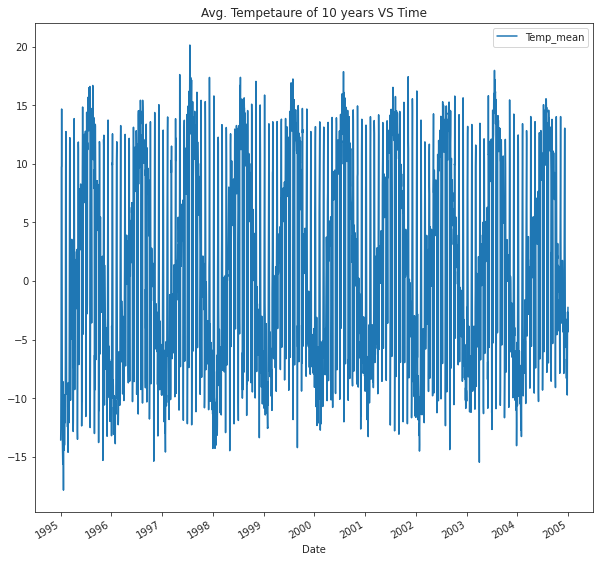

In [429]:
data=df[df["Year"]>1994]
data.plot(kind="line",y="Temp_mean", x="Date",figsize= (10,10)).set_title("Avg. Tempetaure of 10 years VS Time")

##### Monthwise:

Text(0, 0.5, 'Maximum Temparature')

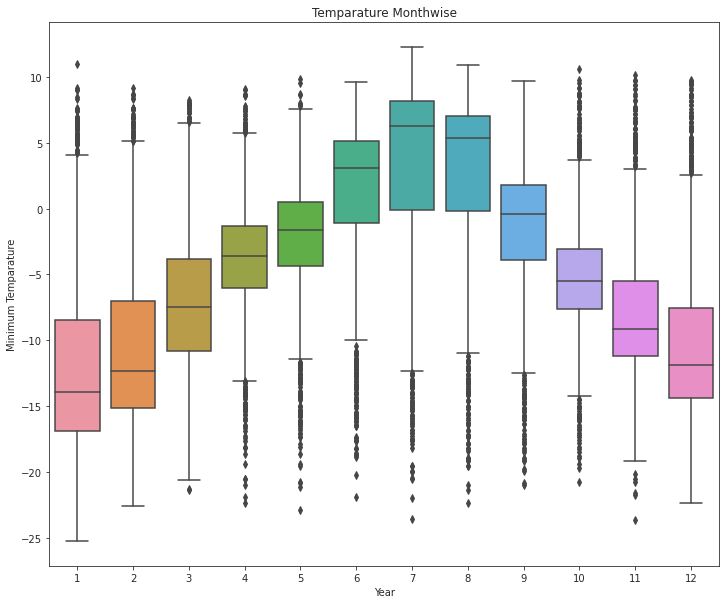

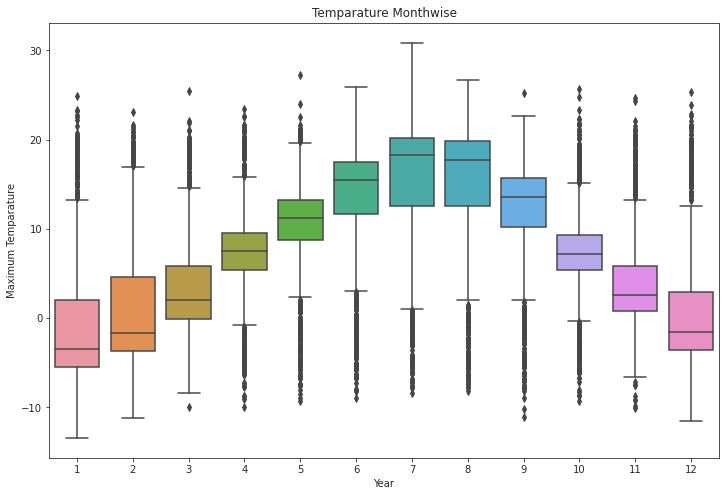

In [430]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 10)
sns.boxplot(data=df,y="Tempmin_avg",x="Month", ax=ax)
plt.title("Temparature Monthwise")
plt.xlabel("Year")
plt.ylabel("Minimum Temparature")
# plt.ylim([-5,10])

sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 8)
sns.boxplot(data=df,y="Tempmax_avg",x="Month", ax=ax)
plt.title("Temparature Monthwise")
plt.xlabel("Year")
plt.ylabel("Maximum Temparature")

In [431]:
from sklearn.linear_model import LinearRegression
def do_regression(X_df, y_df, color):
  lm = LinearRegression()
  X, y= X_df.to_numpy(), y_df.to_numpy()
  model = lm.fit(X.reshape(-1, 1),y)
  plt.scatter(x=X_df, y=y_df)
  plt.plot(X_df, model.coef_*X_df + model.intercept_, color)
  plt.xlabel(X_df.name)
  plt.ylabel(y_df.name)
  plt.show()


##### Areawise:

Text(0.5, 1.0, 'Maximum temperature of 4 cities VS Time')

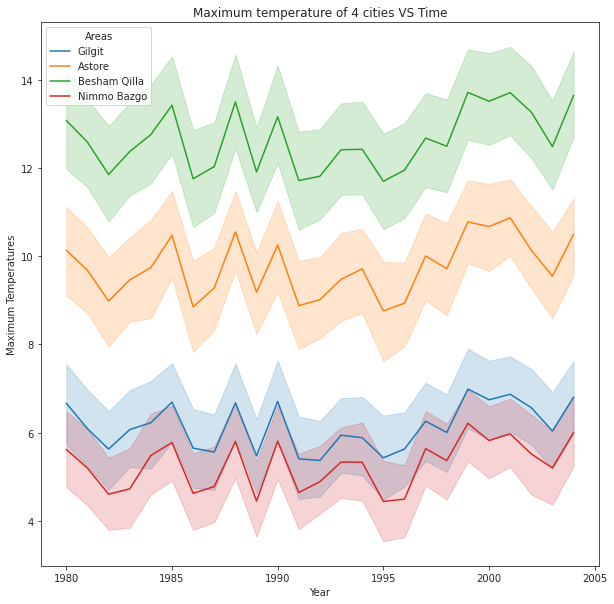

In [432]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax = sns.lineplot(data=df,x = "Year",y= "Gilgit_Tmax")
ax= sns.lineplot(data=df,x = "Year",y= "Astore_Tmax")
ax= sns.lineplot(data=df,x = "Year",y= "Besham_Qilla_Tmax")
ax= sns.lineplot(data=df,x = "Year",y= "Nimmo_Bazgo_Tmax")
ax.set(xlabel='Year', ylabel='Maximum Temperatures')

ax.legend(title='Areas', loc='upper left', labels=['Gilgit', 'Astore', "Besham Qilla","Nimmo Bazgo"])
ax.set_title("Maximum temperature of 4 cities VS Time")

Text(0, 0.5, 'Temparature')

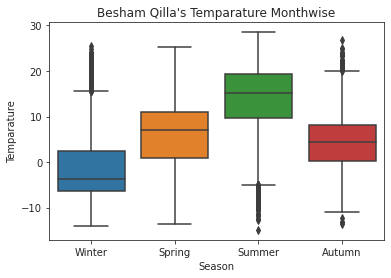

In [433]:
sns.boxplot(data=df,y="Besham_Qilla_Temp",x="season")
plt.title("Besham Qilla's Temparature Monthwise")
plt.xlabel("Season")
plt.ylabel("Temparature")


Text(0, 0.5, 'Temparature')

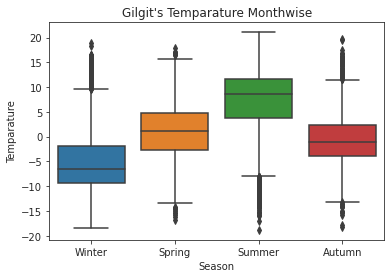

In [434]:
sns.boxplot(data=df,y="Gilgit_Temp",x="season")
plt.title("Gilgit's Temparature Monthwise")
plt.xlabel("Season")
plt.ylabel("Temparature")

Text(0, 0.5, 'Temparature')

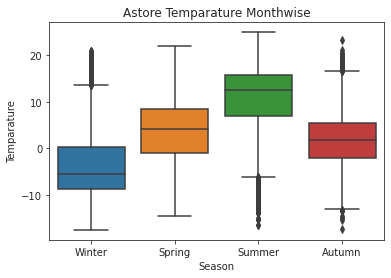

In [435]:

sns.boxplot(data=df,y="Astore_Temp",x="season")
plt.title("Astore Temparature Monthwise")
plt.xlabel("Season")
plt.ylabel("Temparature")

Text(0, 0.5, 'Temparature')

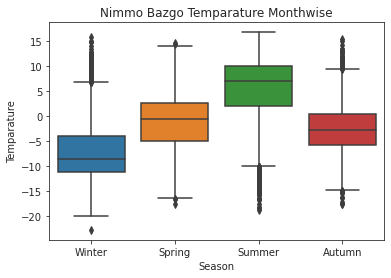

In [436]:
sns.boxplot(data=df,y="Nimmo_Bazgo_Temp",x="season")
plt.title("Nimmo Bazgo Temparature Monthwise")
plt.xlabel("Season")
plt.ylabel("Temparature")

#### Analysing River Flow:

##### 5 Rivers vs Time:

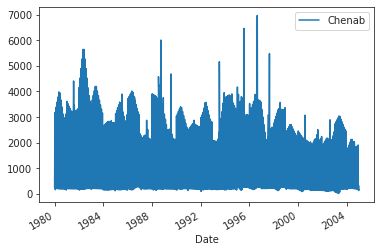

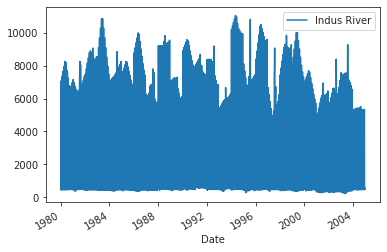

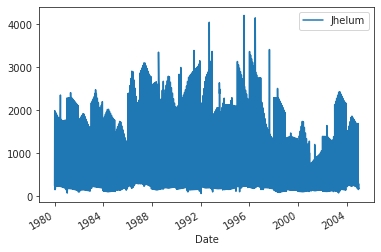

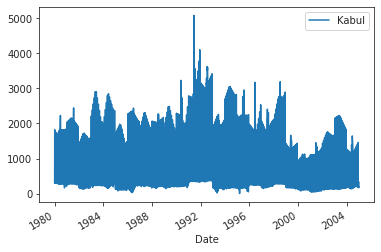

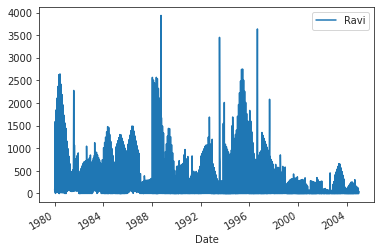

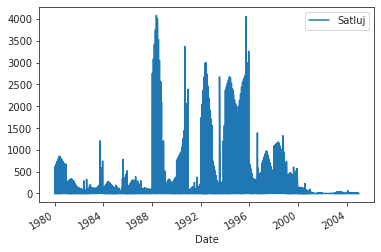

In [437]:
df.plot(x='Date', y='Chenab')
df.plot(x='Date', y='Indus River')
df.plot(x='Date', y='Jhelum')
df.plot(x='Date', y='Kabul')
df.plot(x='Date', y='Ravi')
df.plot(x='Date', y='Satluj')

##### Indus River:

In [438]:
Inflow_data['Year'] = Inflow_data.Date.dt.year

Text(0.5, 1.0, 'Flow of River Indus')

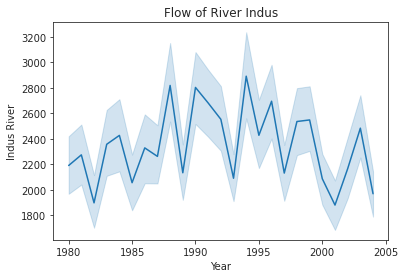

In [439]:

# inflow of river indus
sns.lineplot(data=Inflow_data,x="Year",y="Indus River")
plt.title("Flow of River Indus")

##### Yearwise:

Text(0, 0.5, 'Riverflow')

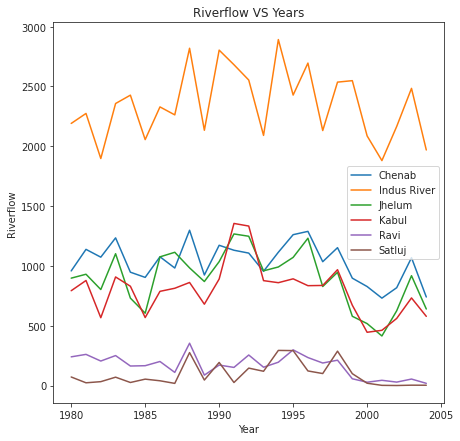

In [440]:
new_df= df
new_df= df.groupby("Year").mean()
new_df = new_df.iloc[:,:6]
new_df.plot(figsize=(7,7)).set_title("Riverflow VS Years")
plt.ylabel("Riverflow")


##### Monthwise:

Text(0, 0.5, 'Riverflow')

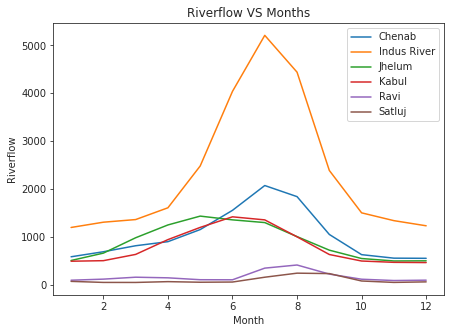

In [441]:
new_df= df
new_df= df.groupby("Month").mean()
new_df = new_df.iloc[:,:6]
new_df.plot(figsize=(7,5)).set_title("Riverflow VS Months")
plt.ylabel("Riverflow")


##### Seasonwise:

In [442]:
Rain_data['Year'] = Rain_data.Date.dt.year
Rain_data['Month'] = Rain_data.Date.dt.month

Text(0, 0.5, 'Riverflow')

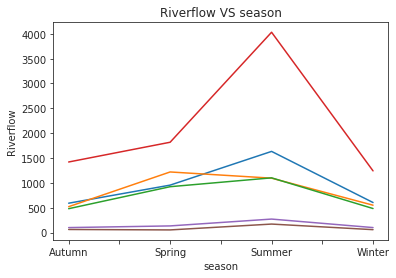

In [443]:
season = df.groupby('season').mean()

season['Chenab'].plot()
season['Jhelum'].plot()
season['Kabul'].plot()
season['Indus River'].plot()
season['Ravi'].plot()
season['Satluj'].plot().set_title("Riverflow VS season")
plt.ylabel("Riverflow")


Text(0.5, 1.0, 'Temperature against season')

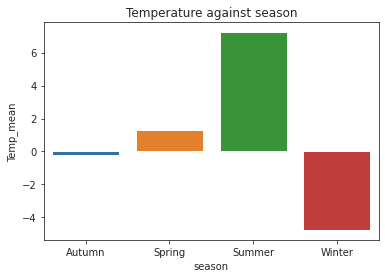

In [444]:
season = df.groupby('season').mean()
sns.barplot(data=season, x=season.index, y='Temp_mean')
plt.title("Temperature against season")

#### Analysing Rainfall Data:

##### Yearwise :

Text(0.5, 1.0, 'Rainfall Yearwise')

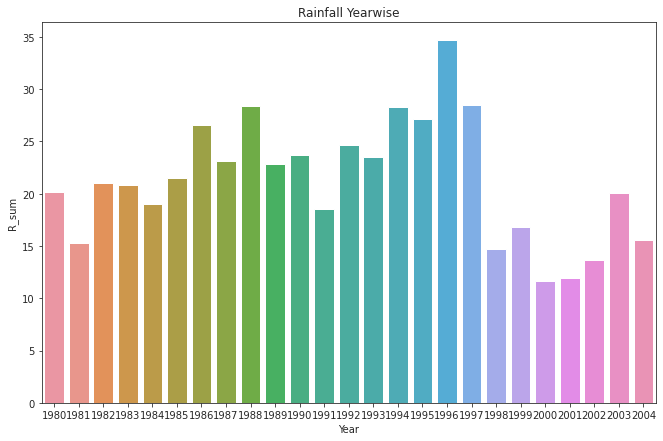

In [445]:
ry = df.groupby('Year').mean()
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.barplot(data=ry, x=ry.index, y='R_sum', ax=ax)
plt.title("Rainfall Yearwise")

##### Monthwise:

Text(0.5, 1.0, 'Rainfall Monthwise')

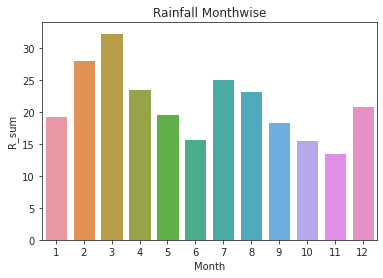

In [446]:
r = df.groupby('Month').mean()
sns.barplot(data=r, x=r.index, y='R_sum')
plt.title("Rainfall Monthwise")

##### Areawise:

Text(0.5, 1.0, 'Rainfall of 4 cities vs Time')

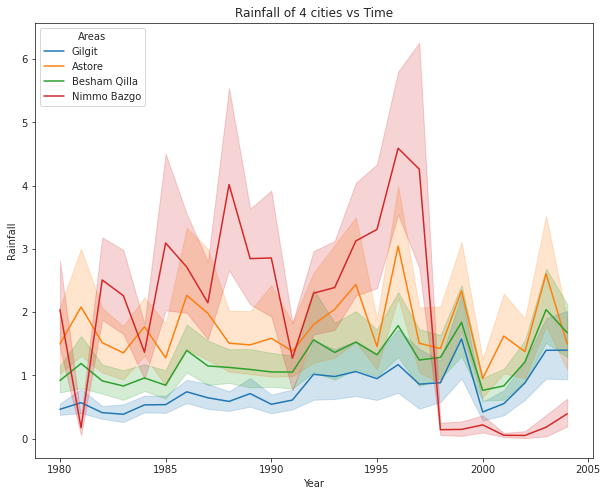

In [447]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
ax = sns.lineplot(data=df,x = "Year",y= "Gilgit_Rain")
ax= sns.lineplot(data=df,x = "Year",y= "Astore_Rain")
ax= sns.lineplot(data=df,x = "Year",y= "Besham_Qilla_Rain")
ax= sns.lineplot(data=df,x = "Year",y= "Nimmo_Bazgo_Rain")
ax.set(xlabel='Year', ylabel='Rainfall')
ax.legend(title='Areas', loc='upper left', labels=['Gilgit', 'Astore', "Besham Qilla","Nimmo Bazgo"])
ax.set_title("Rainfall of 4 cities vs Time")

##### Seasonwise:

Text(0.5, 1.0, 'Rainfall VS season')

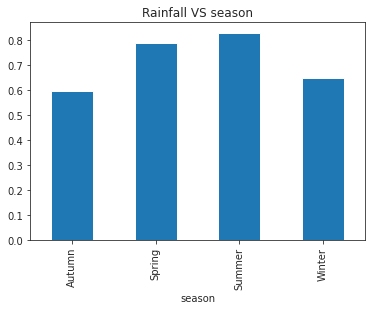

In [448]:
df_rain= df
df_rain= df.groupby("season").mean()
# print(df_rain)
df_rain['Hunza_Rain'].plot(kind="bar").set_title("Rainfall VS season")
# df_rain['Hunza_Temp'].plot(kind="line") #normalize #month wise

In [449]:
s_df = df
s_df = df.groupby("season").sum()


Text(0.5, 1.0, 'Rainfall Monthwise')

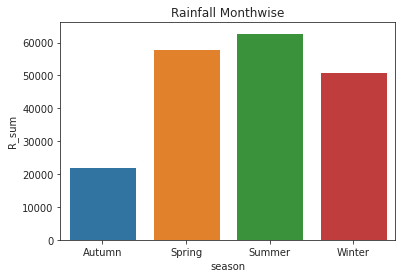

In [450]:
sns.barplot(data=s_df, x=season.index, y='R_sum')
plt.title("Rainfall Monthwise")

#### Correlations: 

##### Temperature VS Rainfall

In [451]:
m_columns=[]
for i in df.columns:
  if 'Tmax' in i:
    m_columns.append(i)

df['maxtemptoday'] = df[m_columns].max(axis=1) 
df

p_columns=[]
for i in df.columns:
  if 'Rain' in i:
    p_columns.append(i)

df['raintoday'] = df[p_columns].sum(axis=1) 


In [452]:
Y_df= df
Y_df = df.groupby("Year").max()


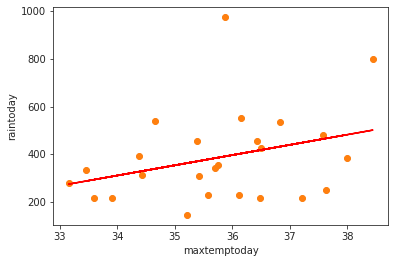

In [453]:
sns.scatterplot(data=Y_df,x='maxtemptoday', y='raintoday')
do_regression(Y_df['maxtemptoday'], Y_df['raintoday'], '-r')

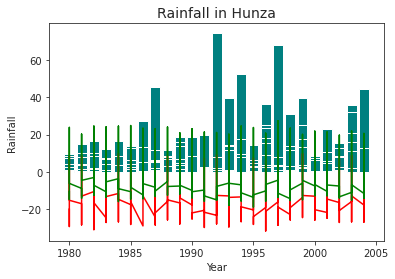

In [454]:
plt.bar(Rain_data['Year'],Rain_data['Hunza_Rain'], color='teal')
plt.plot(df['Year'],df['Hunza_Tmin'],color='red')
plt.plot(df['Year'],df['Hunza_Tmax'],color='green')
plt.title('Rainfall in Hunza', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

##### RiverFlow vs RainFall

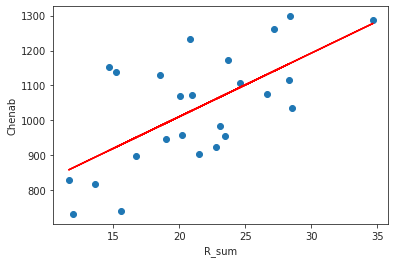

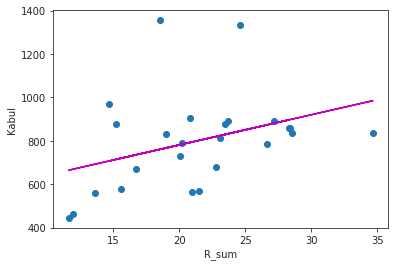

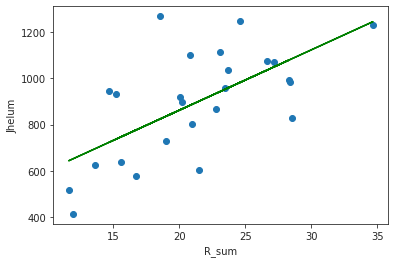

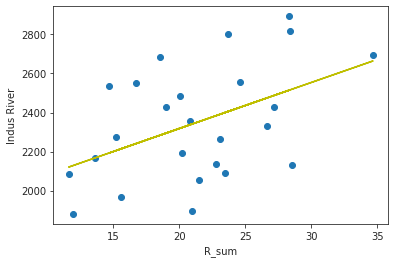

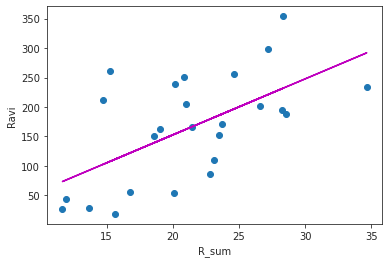

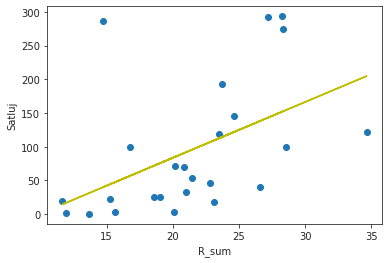

In [455]:
new= df.groupby('Year').mean()
do_regression(new['R_sum'], new['Chenab'], '-r')
do_regression(new['R_sum'], new['Kabul'], '-m')
do_regression(new['R_sum'], new['Jhelum'], '-g')
do_regression(new['R_sum'], new['Indus River'], '-y')
do_regression(new['R_sum'], new['Ravi'], '-m')
do_regression(new['R_sum'], new['Satluj'], '-y')


In [456]:
#no trends in above diagram wrt time, addding a third variable of season and grouping by that

Text(0.5, 1.0, 'Jhelum River')

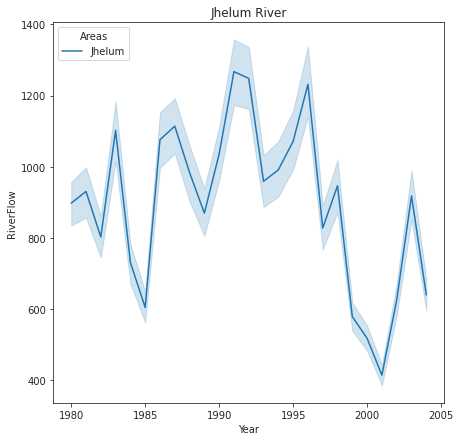

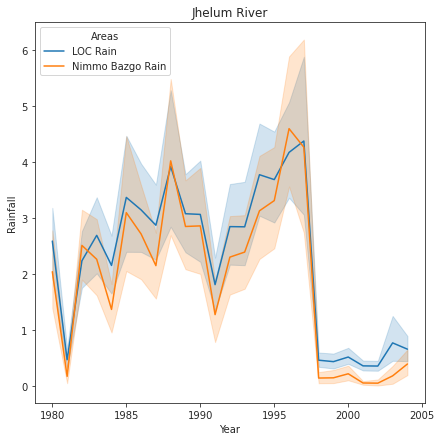

In [457]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax = sns.lineplot(data=df,x = "Year",y= "Jhelum")
ax.set(xlabel='Year', ylabel='RiverFlow')
ax.legend(title='Areas', loc='upper left', labels=['Jhelum'])
ax.set_title("Jhelum River")

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
ax= sns.lineplot(data=df,x = "Year",y= "LOC_Rain")
ax= sns.lineplot(data=df,x = "Year",y= "Nimmo_Bazgo_Rain")
ax.set(xlabel='Year', ylabel='Rainfall')
ax.legend(title='Areas', loc='upper left', labels=['LOC Rain',"Nimmo Bazgo Rain"])
ax.set_title("Jhelum River")


##### RiverFlow VS Temperature

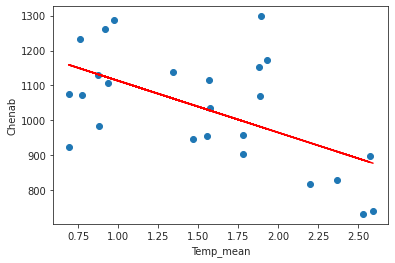

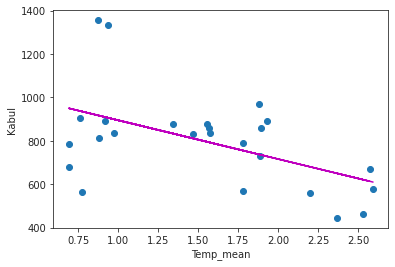

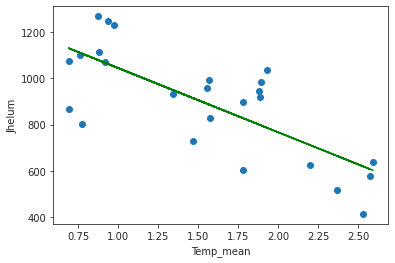

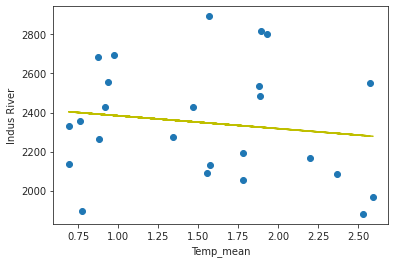

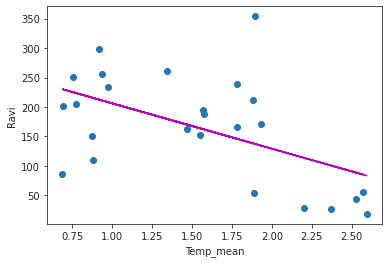

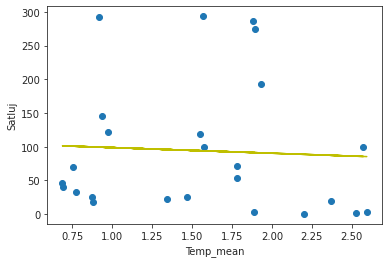

In [458]:
new= df.groupby('Year').mean()
do_regression(new['Temp_mean'], new['Chenab'], '-r')
do_regression(new['Temp_mean'], new['Kabul'], '-m')
do_regression(new['Temp_mean'], new['Jhelum'], '-g')
do_regression(new['Temp_mean'], new['Indus River'], '-y')
do_regression(new['Temp_mean'], new['Ravi'], '-m')
do_regression(new['Temp_mean'], new['Satluj'], '-y')


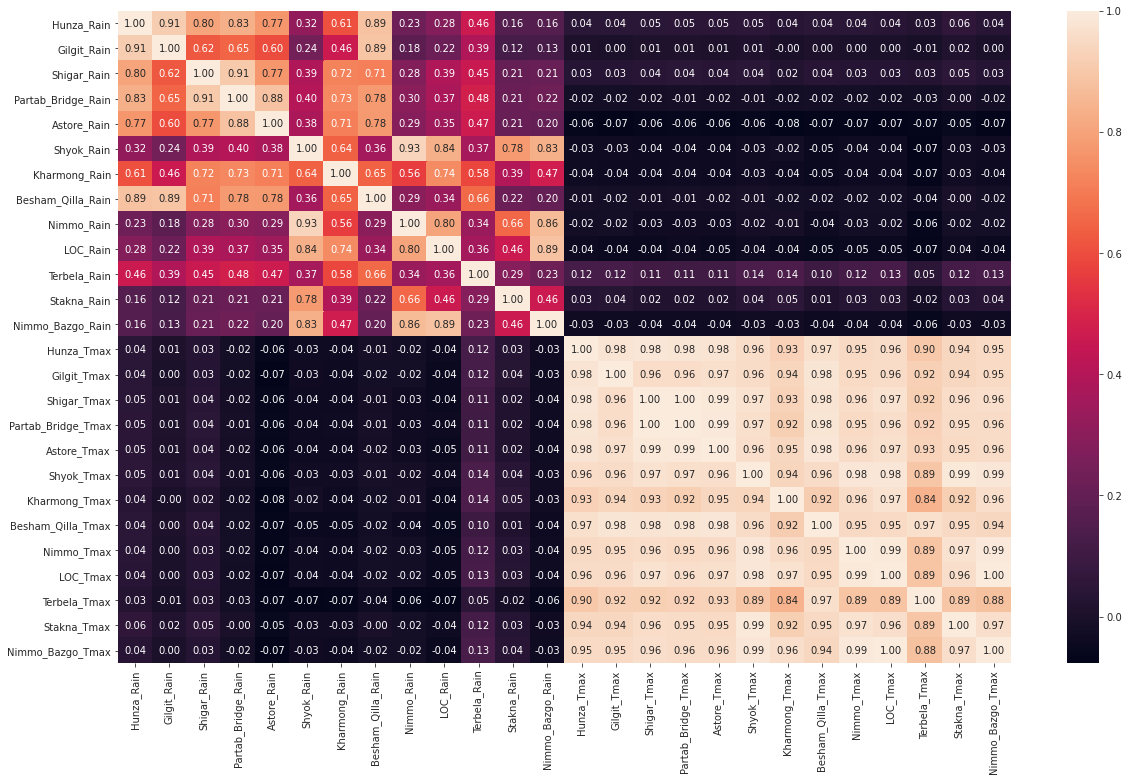

In [459]:
fig, ax = plt.subplots(figsize=[20,12])
temp_rain = p_columns+m_columns
df_r = df[temp_rain]
sns.heatmap(df_r.corr(),square =False,annot=True,fmt='.2f')


#### Model Fitting


In [460]:
df


,Date,Chenab,Indus River,Jhelum,Kabul,Ravi,Satluj,Hunza_Rain,Gilgit_Rain,Shigar_Rain,Partab_Bridge_Rain,Astore_Rain,Shyok_Rain,Kharmong_Rain,Besham_Qilla_Rain,Nimmo_Rain,LOC_Rain,Terbela_Rain,Stakna_Rain,Nimmo_Bazgo_Rain,Hunza_Tmax,Gilgit_Tmax,Shigar_Tmax,Partab_Bridge_Tmax,Astore_Tmax,Shyok_Tmax,Kharmong_Tmax,Besham_Qilla_Tmax,Nimmo_Tmax,LOC_Tmax,Terbela_Tmax,Stakna_Tmax,Nimmo_Bazgo_Tmax,Hunza_Tmin,Gilgit_Tmin,Shigar_Tmin,Partab_Bridge_Tmin,Astore_Tmin,Shyok_Tmin,Kharmong_Tmin,Besham_Qilla_Tmin,Nimmo_Tmin,LOC_Tmin,Terbela_Tmin,Stakna_Tmin,Nimmo_Bazgo_Tmin,Year,Month,Day,season,Hunza_Temp,Gilgit_Temp,Shigar_Temp,Partab_Bridge_Temp,Astore_Temp,Shyok_Temp,Kharmong_Temp,Besham_Qilla_Temp,Nimmo_Temp,LOC_Temp,Tarbela_Temp,Stakna_Temp,Nimmo_Bazgo_Temp,Temp_mean,Tempmin_avg,Tempmax_avg,R_sum,maxtemptoday,raintoday
0,1980-01-01,239.56,493.14,250.82,316.37,100.60,19.40,0.579120,0.624999,1.710244,1.979450,3.121321,18.326730,11.823350,4.068593,34.408740,33.101010,23.334460,8.383513,39.913120,-10.262910,-6.784489,-9.234474,-6.532299,-5.588862,-8.576572,-5.769681,-3.521781,-6.973469,-5.635877,5.972797,-8.205565,-6.215985,-19.762430,-13.584190,-21.149730,-16.628590,-14.912630,-18.647520,-15.562700,-9.582956,-13.882110,-15.922730,1.236497,-16.178110,-16.031870,1980,1,1,Winter,-15.012670,-10.184340,-15.192102,-11.580444,-10.250746,-13.612046,-10.666190,-6.552369,-10.427790,-10.779303,3.604647,-12.191838,-11.123928,-10.305317,-14.662236,-5.948397,181.374650,5.972797,181.374650
1,1980-02-01,254.29,493.99,279.56,326.14,114.90,21.38,0.738178,1.209940,0.599093,0.252871,0.397581,4.898932,2.261054,2.002728,10.752990,1.028557,11.365320,4.047374,0.000000,-13.344990,-5.962011,-11.946110,-8.339725,-6.541431,-11.167280,-6.869953,-3.468385,-9.290842,-7.728179,8.714105,-8.876868,-9.086041,-20.915340,-12.548110,-22.516540,-18.795800,-17.669290,-22.178500,-17.542000,-11.854670,-15.759650,-17.079080,-1.668406,-17.874950,-17.832930,1980,2,1,Winter,-17.130165,-9.255061,-17.231325,-13.567763,-12.105360,-16.672890,-12.205977,-7.661528,-12.525246,-12.403629,3.522849,-13.375909,-13.459485,-11.851653,-16.479636,-7.223670,39.554618,8.714105,39.554618
2,1980-03-01,269.01,494.84,308.30,335.91,129.20,23.36,0.068370,0.081591,0.055665,0.119646,0.234785,1.733478,0.473544,0.991438,0.215351,0.072654,5.972760,2.917583,0.000000,-11.077450,-6.782443,-9.757720,-5.140479,-3.764850,-10.299660,-5.702695,-3.518209,-8.588547,-7.019203,5.344812,-9.322336,-8.014050,-19.231320,-15.294450,-20.946820,-16.307260,-13.609550,-25.860650,-19.078580,-11.343860,-26.338550,-24.774180,-2.915537,-22.584550,-26.988840,1980,3,1,Spring,-15.154385,-11.038446,-15.352270,-10.723869,-8.687200,-18.080155,-12.390637,-7.431035,-17.463549,-15.896691,1.214638,-15.953443,-17.501445,-12.650653,-18.867242,-6.434064,12.936865,5.344812,12.936865
3,1980-04-01,283.73,495.69,337.04,345.68,143.50,25.34,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.851470,-7.845161,-11.370530,-7.654259,-6.009645,-9.879038,-7.154660,-4.871653,-7.510703,-7.544011,3.461929,-8.208817,-7.958966,-18.140580,-12.958830,-19.064210,-14.783660,-12.680610,-23.014290,-16.022190,-9.008148,-20.739420,-19.402930,-0.678736,-20.593350,-21.142100,1980,4,1,Spring,-14.996025,-10.401995,-15.217370,-11.218960,-9.345128,-16.446664,-11.588425,-6.939901,-14.125062,-13.473470,1.391596,-14.401084,-14.550533,-11.639463,-16.017620,-7.261306,0.000000,3.461929,0.000000
4,1980-05-01,298.46,496.54,365.78,355.45,157.80,27.33,0.014116,0.201661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.340026,-1.523219,-6.577409,-2.895386,-1.509851,-8.329305,-4.234715,0.093251,-6.282010,-5.023972,7.433898,-7.593534,-5.932080,-14.064330,-8.152850,-15.985040,-11.756900,-10.236750,-19.276620,-12.989250,-6.582533,-19.600320,-14.773400,-0.074040,-21.335960,-16.338180,1980,5,1,Spring,-9.702178,-4.838035,-11.281225,-7.326143,-5.873301,-13.802962,-8.611982,-3.24464

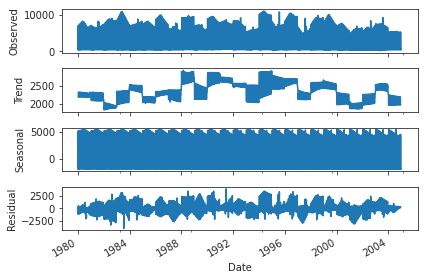

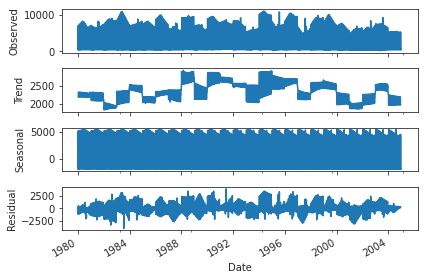

In [461]:
import statsmodels.api as sm
new= df
new.index = pd.DatetimeIndex(new.Date, freq='infer')

# ETS Decomposition 
decomp = sm.tsa.seasonal_decompose(new['Indus River'], freq=365,model='add')
decomp.plot()

In [462]:
train = new.iloc[:len(new)-366] 
test = new.iloc[len(new)-365:] # set one year(12 months) for testing 
  
# Train the model on the full dataset 
model = SARIMAX(new['Indus River'],  
                        order = (0, 1, 1),  
                        seasonal_order =(2, 1, 1, 12)) 
result = model.fit()
print(result) 
result.summary() 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        Indus River   No. Observations:                 9132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood              -54694.492
Date:                            Thu, 03 Dec 2020   AIC                         109398.983
Time:                                    17:11:59   BIC                         109434.574
Sample:                                         0   HQIC                        109411.086
                                           - 9132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9998      0.001    703.374      0.000       0.997       1.003
ar.S.L12       0.0456      0.005      9.553      0.000       0.036       0.055
ar.S.L24       0.9520      0.010     94.668      0.000       0.932       0.972
ma.S.L12      -0.9998      0.030    -33.441      0.000      -1.058      -0.941
sigma2      9444.5620    297.066     31.793      0.000    8862.324       1e+04
===================================================================================
Ljung-Box (Q):                    21086.91   Jarque-Bera (JB):             13870.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

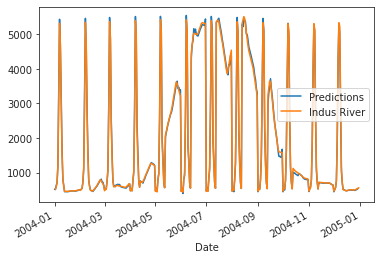

In [463]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
							typ = 'levels').rename("Predictions") 

# plot predictions and actual values 
predictions.plot(legend = True) 
test['Indus River'].plot(legend = True) 


Multiple Regression


In [464]:
def again_regression(X_df, y_df):
  lm = LinearRegression()
  X, y= X_df.to_numpy(), y_df.to_numpy()
  model = lm.fit(X.reshape(-1, 1),y)
  return model

def plot_regr(X_df, y_df, model, color):
  plt.scatter(x=X_df, y=y_df)
  plt.plot(X_df, model.coef_*X_df + model.intercept_, color)
  plt.xlabel(X_df.name)
  plt.ylabel(y_df.name)
  return plt

In [465]:
new = df
X= new[['R_sum', 'Temp_mean']][new['Year']<2004]
y= new['Indus River'][new['Year']<2004]
regr = LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

new_rain= new['R_sum'][new['Year']==2004].mean()
new_temp = new['Temp_mean'][new['Year']==2004].mean()


#predicting
print ('Predicted Flow: \n', regr.predict([[new_rain ,new_temp]]))
print ('Actual Flow: \n', new['Indus River'][new['Year']==2004].mean())

#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()


Intercept: 
 1945.7376638301296
Coefficients: 
 [  2.51548943 243.9303811 ]
Predicted Flow: 
 [2617.5821274]
Actual Flow: 
 1969.3439890710376


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Indus River   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     9421.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:12:00   Log-Likelihood:                -75853.
No. Observations:                8766   AIC:                         1.517e+05
Df Residuals:                    8763   BIC:                         1.517e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1945.7377     16.487    118.016      0.000    1913.419    1978.056
R_sum          2.5155      0.314      7.999      0.000       1.899       3.132
Temp_mean    243.9304      1.781    136.965      0.000     240.439     247.421
==============================================================================
Omnibus:                      895.418   Durbin-Watson:                   0.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1248.048
Skew:                           0.813   Prob(JB):                    9.77e-272
Kurtosis:                       3.880   Cond. No.                         57.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

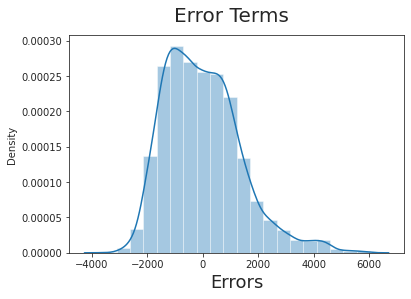

In [466]:
y_train_price = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [467]:
#testing
X_test = new[['R_sum', 'Temp_mean']][new['Year']==2004]
y_test = new['Indus River'][new['Year']==2004]

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

# Making predictions using the final model
y_pred_m4 = lr_1.predict(X_test_m4)

In [468]:
from sklearn.metrics import r2_score
print('R-squared value of train model \n', 0.683)
print('R-squared value of test model \n', round(r2_score(y_true = y_test, y_pred = y_pred_m4),3))

R-squared value of train model 
 0.683
R-squared value of test model 
 0.541
